In [13]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import *

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/li

In [2]:
df = pd.read_csv("/data/iris.csv")

In [4]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
features = ["SepalLengthCm", "PetalLengthCm"]

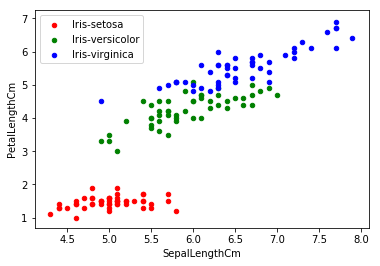

In [34]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, species in enumerate(df.Species.unique()):
    df[df.Species == species].plot.scatter(features[0]
                        , features[1], label = species, ax = ax, color = colors[i])

In [26]:
X = df[features]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns = features).head()

,SepalLengthCm,PetalLengthCm
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272


In [27]:
k = 3

In [28]:
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
y = kmeans.fit_predict(X)

In [29]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [30]:
kmeans.cluster_centers_ # centroids of the 3 clusters

array([[ 0.03665519,  0.41727267],
       [-1.01511749, -1.22859407],
       [ 1.22961906,  1.02857275]])

In [33]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[5.87358491, 4.49245283],
       [5.00555556, 1.59814815],
       [6.85813953, 5.56744186]])

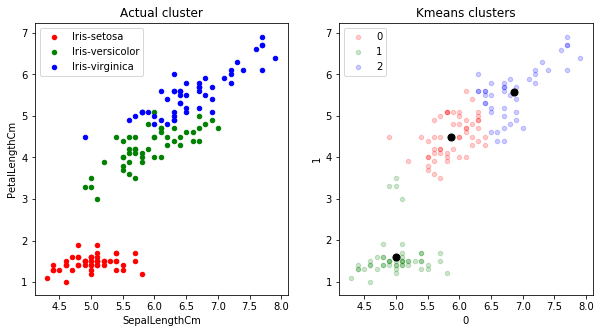

In [74]:
fig, _ = plt.subplots(1, 2, figsize = (10, 5))

ax = fig.axes[0]
colors = ["red", "green", "blue"]
for i, species in enumerate(df.Species.unique()):
    df[df.Species == species].plot.scatter(features[0]
                        , features[1], label = species, ax = ax, color = colors[i])

ax.set_title("Actual cluster")


ax = fig.axes[1]
colors = ["red", "green", "blue"]
for i in range(k):
    df[y == i].plot.scatter(features[0]
                        , features[1], ax = ax, label = i, color = colors[i], alpha = 0.2)
ax.set_title("Kmeans clusters")


pd.DataFrame(centroids).plot.scatter(0, 1, ax = ax, color = "black", s = 50)

In [52]:
y_actual = preprocessing.LabelEncoder().fit_transform(df.Species)
metrics.homogeneity_score(y_actual, y)

0.5826296711195839

In [53]:
kmeans.inertia_

43.038870666761774

In [55]:
df["cluster"] = y
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
41,42,4.5,2.3,1.3,0.3,Iris-setosa,1
115,116,6.4,3.2,5.3,2.3,Iris-virginica,2
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,2
112,113,6.8,3.0,5.5,2.1,Iris-virginica,2
33,34,5.5,4.2,1.4,0.2,Iris-setosa,1
94,95,5.6,2.7,4.2,1.3,Iris-versicolor,0
128,129,6.4,2.8,5.6,2.1,Iris-virginica,2
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,0


In [56]:
import numpy as np

array([[0.03665519, 0.41727267]])

In [71]:
distances = np.zeros(len(df))
for i in range(k):
    distances_within_cluster = metrics.pairwise_distances(X[y==i], kmeans.cluster_centers_[i:i+1, :])[:,0]
    distances[y==i] = distances_within_cluster 
df["distance"] = distances
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0.160599
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.170454
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0.407209
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0.494562
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0.112879


In [72]:
df.distance.mean()

0.4587927303102387

In [98]:
df.groupby("cluster").distance.agg(["count", "mean"])

,count,mean
cluster,,
0,53,0.435640
1,54,0.402361
2,43,0.558198


In [81]:
df["outlier"] = False

In [89]:
def outlier(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    return (y > upper_whisker) | (y < lower_whisker)

In [90]:
for i in range(k):
    outliers = outlier(df[df.cluster == i].distance).values
    df.loc[df.cluster == i, "outlier"] = outliers
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,outlier
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0.160599,False
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.170454,False
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0.407209,False
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0.494562,False
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0.112879,False


In [91]:
df[df.outlier]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,outlier
106,107,4.9,2.5,4.5,1.7,Iris-virginica,0,1.179680,True
117,118,7.7,3.8,6.7,2.2,Iris-virginica,2,1.206364,True
118,119,7.7,2.6,6.9,2.3,Iris-virginica,2,1.270726,True
122,123,7.7,2.8,6.7,2.0,Iris-virginica,2,1.206364,True
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2,1.348258,True


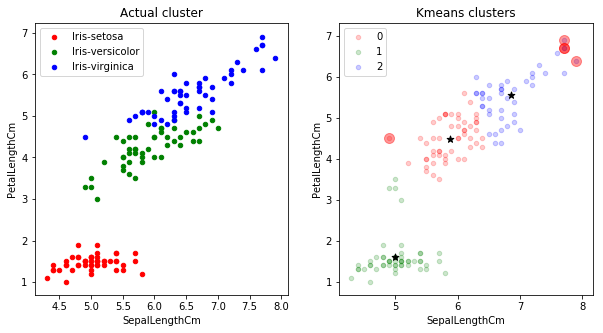

In [96]:
fig, _ = plt.subplots(1, 2, figsize = (10, 5))

ax = fig.axes[0]
colors = ["red", "green", "blue"]
for i, species in enumerate(df.Species.unique()):
    df[df.Species == species].plot.scatter(features[0]
                        , features[1], label = species, ax = ax, color = colors[i])

ax.set_title("Actual cluster")


ax = fig.axes[1]
colors = ["red", "green", "blue"]
for i in range(k):
    df[y == i].plot.scatter(features[0]
                        , features[1], ax = ax, label = i, color = colors[i], alpha = 0.2)
ax.set_title("Kmeans clusters")


pd.DataFrame(centroids).plot.scatter(0, 1, ax = ax, color = "black", s = 50, marker = "*")
df[df.outlier].plot.scatter(features[0], features[1], color = "red", s = 100, ax = ax, alpha = 0.4)

In [97]:
df.cluster.value_counts()

1    54
0    53
2    43
Name: cluster, dtype: int64

Text(0.5,1,'Elbow method')

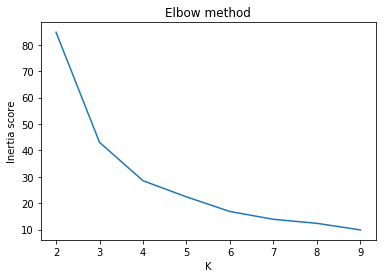

In [106]:
scores = []
for k in range(2, 10):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    scores.append(model.inertia_)
plt.plot(range(2, 10), scores)
plt.xlabel("K")
plt.ylabel("Inertia score")
plt.title("Elbow method")

In [107]:
pd.read_csv("/data/snsdata.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


In [117]:
# Use 4 features and see if the clustering get better. Use Homogenity score to compare results.

In [118]:
X4 = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X4 = preprocessing.StandardScaler().fit_transform(X4)
kmeans = cluster.KMeans(n_clusters=3)
y = kmeans.fit_predict(X4)
metrics.homogeneity_score(y_actual, y)

0.6591265018049008

In [122]:
X4 = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X4 = preprocessing.StandardScaler().fit_transform(X4)
pca = decomposition.PCA(n_components=2)
X4 = pca.fit_transform(X4)
kmeans = cluster.KMeans(n_clusters=3)
y = kmeans.fit_predict(X4)
metrics.homogeneity_score(y_actual, y)

0.6591265018049008